In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
# Data dictionaries
racial_data = {
    'Black': [10.8, 10.2, 10.5, 11.8],
    'Asian': [2.9, 2.9, 3.4, 3.4],
    'Hispanic': [2.9, 3.7, 4.2, 4.3],
    'Other': [14.6, 15.0, 0, 0],
    'White': [68.8, 68.2, 82.0, 80.5]
}

gender_data = {
    'Male': [55.8, 57.8, 57.4, 57.6],
    'Female': [44.2, 42.2, 42.6, 42.4]
}

proficiency_data = {
    'Proficient': [89.8, 89.2, 89.3, 90.0],
    'Limited': [10.2, 10.8, 10.7, 10.0]
}

# Creating DataFrames
df_racial = pd.DataFrame(racial_data)
df_gender = pd.DataFrame(gender_data)
df_proficiency = pd.DataFrame(proficiency_data)

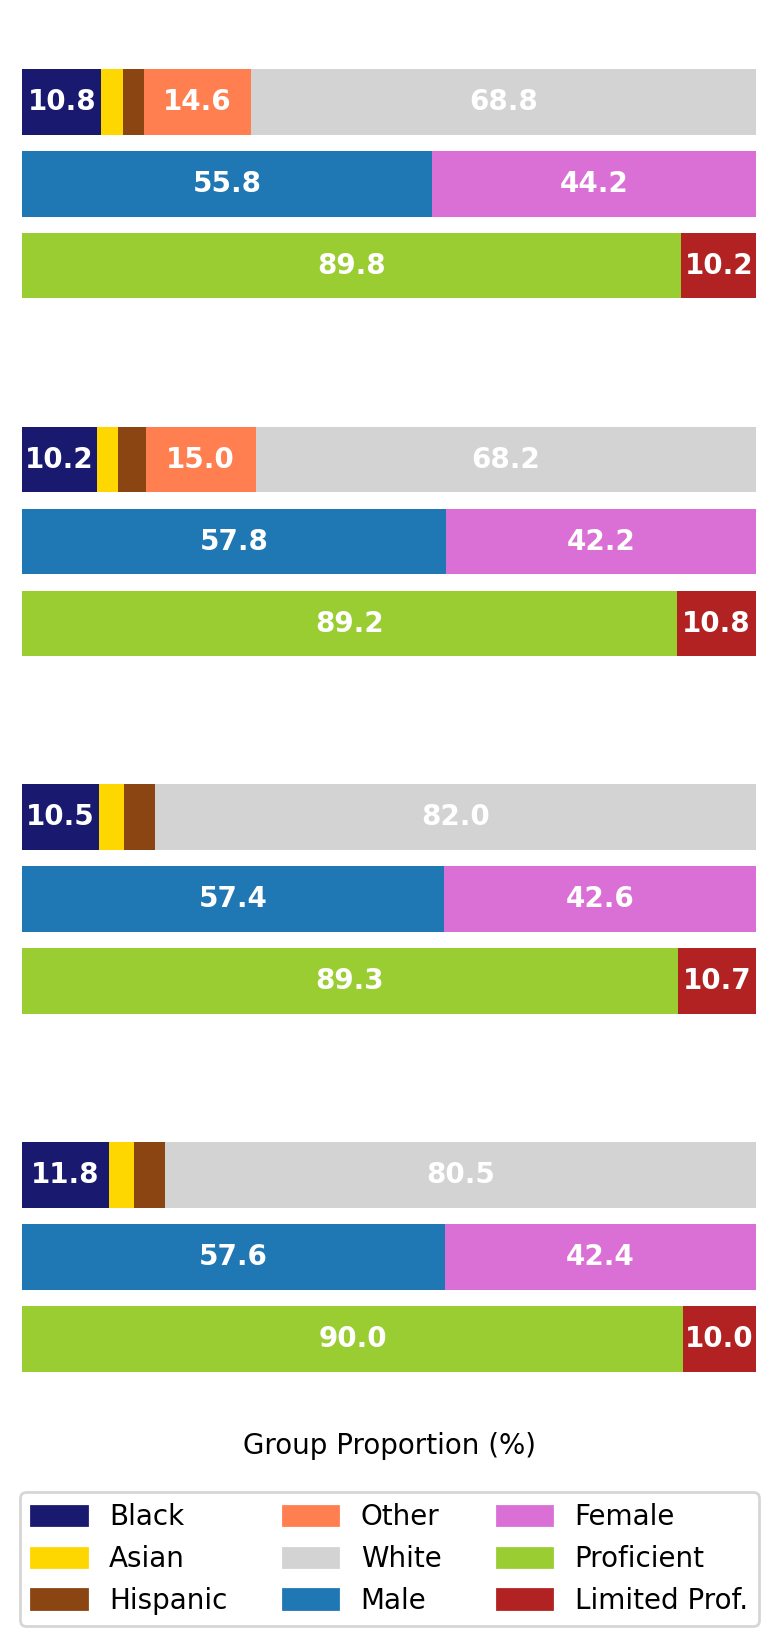

In [10]:
colors_racial = ['midnightblue', 'gold', 'saddlebrown', 'coral', 'lightgrey']
colors_gender = ['tab:blue', 'orchid']
colors_proficiency = ['yellowgreen', 'firebrick']


fig, axes = plt.subplots(4, 1, figsize=(4, 7.5))

labels = ['Race and Ethnicity', 'Sex', 'English Proficiency']

for i, ax in enumerate(axes):
    # Extract rows
    data_racial = df_racial.iloc[i]
    data_gender = df_gender.iloc[i]
    data_proficiency = df_proficiency.iloc[i]

    # For vertical positioning within each lane
    positions = [2, 1, 0]

    for j, (data, colors) in enumerate(zip(
        [data_racial, data_gender, data_proficiency],
        [colors_racial, colors_gender, colors_proficiency]
    )):
        position = positions[j]
        cum_width = 0
        for value, color in zip(data, colors):
            ax.barh(position, value, left=cum_width, color=color, height=.8)

            if value > 5:
              # Add data labels
              width = value
              ax.text(cum_width + width/2, position, '{:.1f}'.format(value),
                      ha='center', va='center', color='white', fontweight='bold')
            cum_width += value


    ax.set_xlim(0, 100)
    ax.set_ylim(-1, 3)

    ax.set_yticks([])
    ax.set_xticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

ax.set_xlabel('Group Proportion (%)')

# Add legend to the bottom
racial_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors_racial]
gender_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors_gender]
proficiency_patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors_proficiency]

racial_labels = ['Black', 'Asian', 'Hispanic', 'Other', 'White']
gender_labels = ['Male', 'Female']
proficiency_labels = ['Proficient', 'Limited Prof.']

legend_handles = racial_patches + gender_patches + proficiency_patches
legend_labels = racial_labels + gender_labels + proficiency_labels

fig.legend(legend_handles, legend_labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))


plt.tight_layout()
plt.show()